In [39]:
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn import preprocessing
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,cross_val_score
from sklearn.preprocessing import minmax_scale
import sklearn.metrics as metrics
from sklearn.metrics import precision_score,auc, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score,classification_report,average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold 

#importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE

import scipy
from scipy.stats import ranksums
from scipy.stats import shapiro


warnings.filterwarnings("ignore")

In [2]:
###import CNV and feature datasets
feature_file_del = pd.read_csv("DEL FILE",sep='\t', header=None)
feature_file_dup = pd.read_csv("/DUP FILE",sep='\t', header=None)

feature_file_del.columns = ['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_gene','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_30','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']
feature_file_dup.columns = ['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_gene','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_30','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']


cols = ['chr', 'start', 'end']
feature_file_del['combined'] = feature_file_del[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
feature_file_del=feature_file_del.set_index('combined')
feature_file_dup['combined'] = feature_file_dup[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
feature_file_dup=feature_file_dup.set_index('combined')

print(feature_file_del.shape,feature_file_dup.shape)

(13787, 240) (13929, 240)


In [9]:
###preprocessing copy number loss data
feature_file_del['length'] = feature_file_del['end'] - feature_file_del['start']
X_del = feature_file_del[['10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain',
                            '17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain',
                            '5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_observed_Brain',
                            'Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper', 'Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper',
                            'Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper', 'ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2',
                            'ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_region_curation_Haploinsufficiency_0',
                            'ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3',
                            'ClinGen_region_curation_Haploinsufficiency_40','ctcf','CTCF_observed_Brain','DacMapExclude','ddg2p_loss', 'DNaselClusterd','DnaseMaster','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude',
                            'EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP', 'enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph',
                            'Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','GC','gencode_CDS','gencode_exon','gencode_gene',
                            'gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union',
                            'H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain',
                            'H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain',
                            'H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain',
                            'H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000707','HP_0000708',
                            'HP_0000717','HP_0000729','HP_0000752','HP_0001197','HP_0001250','HP_0001507','HP_0002011','HP_0002715','HP_0002960','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100753',
                            'HP_0100852','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA',
                            'non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers',
                            'nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','phastCons46way','phyloP46way',
                            'POLR2A_imputed_Neurosph','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP', 'PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR',
                            'PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI',
                            'SEA00101','SE_ele','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo']]
X_del.index = feature_file_del.index
y_del = feature_file_del["disType"].to_frame()         
X_leng_del = X_del.div(feature_file_del['length'], axis='rows')

print('x,y shape', np.array(X_del).shape, np.array(y_del).shape)
print('No. samples', len(feature_file_del.index.values))

x,y shape (13787, 172) (13787, 1)
No. samples 13787


In [8]:
###preprocessing copy number gain data
feature_file_dup['length'] = feature_file_dup['end'] - feature_file_dup['start']
X_dup = feature_file_dup[['10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain',
                            '15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain',
                            '3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_observed_Brain',
                            'Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper',
                            'Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1',
                            'ClinGen_region_curation_Triplosensitivity_2', 'ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40',
                            'ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2', 'ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40',
                            'ClinGen_triplosensitivity_gene','ctcf', 'CTCF_observed_Brain','DacMapExclude','ddg2p_gain', 'DNaselClusterd','DnaseMaster','DNase-seq_observed_Brain',
                            'DNase-seq_observed_Neurosph','DukeMapExclude', 'EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP',
                            'enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph', 'Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count',
                            'famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1',  'gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene',
                            'gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union',
                            'H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain',
                            'H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain',
                            'H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain',
                            'H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000707','HP_0000708', 'HP_0000717','HP_0000729','HP_0000752','HP_0001197','HP_0001250','HP_0001507',
                            'HP_0002011','HP_0002715','HP_0002960','HP_0011446','HP_0012443', 'HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100753',
                            'HP_0100852','liu_csbj_targetgene', 'methMCRF','mgi_essential_gene','miRNA', 'non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters',
                            'nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','phastCons46way','phyloP46way',
                            'POLR2A_imputed_Neurosph', 'PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR',
                            'PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','RoadmapDNasePromCount', 'Collins_rCNV_PLIgenes_PTS',
                            'SEA00101','SE_ele','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex', 'TAD56','tss2000bp','vista','yue_loops_hippo']]
X_dup.index = feature_file_dup.index
y_dup = feature_file_dup["disType"].to_frame()          #Target Variable
X_leng_dup = X_dup.div(feature_file_dup['length'], axis='rows')

print('x,y shape', np.array(X_dup).shape, np.array(y_dup).shape)
print('No.samples', len(feature_file_dup.index.values))

x,y shape (13929, 172) (13929, 1)
No.samples 13929


In [10]:
##preprocessing training dataset
scaler_del = preprocessing.MinMaxScaler()
scaler_dup = preprocessing.MinMaxScaler()
X_new_del = pd.DataFrame(scaler_del.fit_transform(X_leng_del),  columns=X_leng_del.columns)
X_new_dup = pd.DataFrame(scaler_dup.fit_transform(X_leng_dup),  columns=X_leng_dup.columns)

#### split the data into train and test sets
X_train_del,X_test_del,y_train_del,y_test_del = train_test_split(X_new_del,y_del,test_size=0.2,random_state=12343)
X_train_dup,X_test_dup,y_train_dup,y_test_dup = train_test_split(X_new_dup,y_dup,test_size=0.2,random_state=12333)

In [ ]:
####Model training########

In [17]:
####training copy number loss (Parameters are optimized using grid search)
xgbmodel_del_tun = XGBClassifier(
        learning_rate =0.05,
        n_estimators=140,
        gamma=0.3, 
        max_depth=9,
        min_child_weight=1,      
        subsample=0.8,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=100,       
        seed=27)
xgbmodel_del_tun.fit(X_train_del,y_train_del) 
y_pred_del = xgbmodel_del_tun.predict_proba(X_test_del)
print("\troc_auc_score_pred：\n",roc_auc_score(y_test_del, y_pred_del[:, 1])) 

	roc_auc_score_pred：
 0.8619650727821291


In [18]:
####training copy number gain (Parameters are optimized using grid search)
xgbmodel_dup_tun = XGBClassifier(
            learning_rate =0.05,
            n_estimators=140,
            gamma=0.2,  
            max_depth=8,
            min_child_weight=1,      
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=100,       
            seed=25 )
xgbmodel_dup_tun.fit(X_train_dup,y_train_dup)
y_pred_dup = xgbmodel_dup_tun.predict_proba(X_test_dup)
print("\troc_auc_score_pred：\n",roc_auc_score(y_test_dup, y_pred_dup[:, 1])) 

	roc_auc_score_pred：
 0.8599686122144268


In [ ]:
####Performance##################

In [26]:
##import independent datasets
clinvar_del = pd.read_csv("/media/eys/lxs/project/cnv_path/validation_202107/feature/combined_feature/pathDel_sort_neuroDev_HPO0012759_clean",sep='\t', header=None)
gd_del = pd.read_csv("/media/eys/lxs/project/cnv_path/validation_202107/feature/combined_feature/commDel_sort_feature_combine_clean",sep='\t', header=None)
clinvar_del.columns = ['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']
gd_del.columns = ['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']

clinvar_dup = pd.read_csv("/media/eys/lxs/project/cnv_path/validation_202107/feature/combined_feature/pathDup_sizematch_feature",
                          sep='\t', header=None)
gd_dup = pd.read_csv("/media/eys/lxs/project/cnv_path/validation_202107/feature/combined_feature/controlDup_sizematch_feature",
                     sep='\t', header=None)
clinvar_dup.columns = ['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']
gd_dup.columns =['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']


print(clinvar_del.shape,gd_del.shape,clinvar_dup.shape,gd_dup.shape)

#preprocessing 
del_frames_del = [clinvar_del, gd_del]
val_del = pd.concat(del_frames_del)
cols = ['chr', 'start', 'end']
val_del['combined'] = val_del[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
val_del=val_del.set_index('combined')


dup_frames_dup = [clinvar_dup, gd_dup]
val_dup = pd.concat(dup_frames_dup)
cols = ['chr', 'start', 'end']
val_dup['combined'] = val_dup[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
val_dup=val_dup.set_index('combined')



(886, 238) (2156, 238) (10, 238) (10, 238)


In [29]:
#copy number loss 
X_val_del = val_del[['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain', '13_Het_chromHMM_brain', '14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain', '17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain', '5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper',
                            'Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper', 'ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2',
                            'ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3', 'ClinGen_haploinsufficiency_gene_40','ClinGen_region_curation_Haploinsufficiency_0', 'ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3',
                            'ClinGen_region_curation_Haploinsufficiency_40','ctcf','CTCF_observed_Brain','DacMapExclude','ddg2p_loss', 'DNaselClusterd','DnaseMaster','DNase-seq_observed_Brain',
                            'DNase-seq_observed_Neurosph','DukeMapExclude', 'EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP',
                            'enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph', 'Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','GC','gencode_CDS','gencode_exon','gencode_gene',
                            'gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union', 'H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain',
                            'H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain',
                            'H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0001197','HP_0001250','HP_0001507','HP_0002011','HP_0002715','HP_0002960','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100753',
                            'HP_0100852','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR',
                            'PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','RoadmapDNasePromCount', 'Collins_rCNV_PLIgenes_PHI',
                            'SEA00101','SE_ele','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo']]

cols = ['chr', 'start', 'end']
X_val_del['combined'] = X_val_del[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
X_val_del = X_val_del.set_index('combined')
y_val_del = val_del["disType"].to_frame()   

X_val_del['length'] = X_val_del['end'] - X_val_del['start']
X_val_del=X_val_del.drop(['chr'], axis=1)
X_val_del_leng = X_val_del.div(X_val_del['length'], axis='rows')

X_val_del_leng=X_val_del_leng.drop(['start','end','length'], axis=1)
X_val_del_new = pd.DataFrame(minmax_scale(X_val_del_leng),  columns=X_val_del_leng.columns)

In [28]:
#copy number gain
X_val_dup = val_dup[['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain',
                            '7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1',
                            'ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ctcf',                    'CTCF_observed_Brain','DacMapExclude','ddg2p_gain',
                            'DNaselClusterd','DnaseMaster','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP',
                            'enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count',
                            'famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene',
                            'gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union',
                            'H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain',
                            'H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain',
                            'H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0001197','HP_0001250','HP_0001507','HP_0002011','HP_0002715','HP_0002960','HP_0011446','HP_0012443',
                            'HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100753','HP_0100852','liu_csbj_targetgene','methMCRF','mgi_essential_gene','miRNA','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters',
                            'nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer', 'Olfactory_receptors_mainland','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','RoadmapDNasePromCount',
                            'Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo']]

cols = ['chr', 'start', 'end']
X_val_dup['combined'] = X_val_dup[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
X_val_dup=X_val_dup.set_index('combined')
y_val_dup = val_dup["disType"].to_frame()        

X_val_dup['length'] = X_val_dup['end'] - X_val_dup['start']
X_val_dup=X_val_dup.drop(['chr'], axis=1)
X_val_dup_leng = X_val_dup.div(X_val_dup['length'], axis='rows')

X_val_dup_leng=X_val_dup_leng.drop(['start','end','length'], axis=1)
X_val_dup_new = pd.DataFrame(minmax_scale(X_val_dup_leng),  columns=X_val_dup_leng.columns)

x,y shape (20, 175) (20, 1)


In [30]:
#prediction and output 
y_pred_del=xgbmodel_del_tun.predict_proba(X_val_del_new)[:, 1]
y_pred_dup=xgbmodel_dup_tun.predict_proba(X_val_dup_new)[:, 1]

In [38]:
###readin dataframe from neuroscore and svsscore prediction####
###import dataset
svsDel = pd.read_csv("svs_del.bed",sep='\t')
svsDup = pd.read_csv("svs_dup.bed",sep='\t')

svsDel=svsDel.set_index('combined')
svsDup=svsDup.set_index('combined')

print(roc_auc_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN']),roc_auc_score(svsDel['disType'], svsDel['X0']))
print(roc_auc_score(svsDup['disType'], svsDup['SVSCORESUM_SPAN']),roc_auc_score(svsDup['disType'], svsDup['X0']))



print(average_precision_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN']),average_precision_score(svsDel['disType'], svsDel['X0']))
print(average_precision_score(svsDup['disType'], svsDup['SVSCORESUM_SPAN']),average_precision_score(svsDup['disType'], svsDup['X0']))

0.6195189444544491 0.9306361165438883
0.61 0.67
0.5609233296040375 0.8781525588699017
0.655239898989899 0.6845284780578899


In [ ]:
####plot PR and AUC curves in the independent sets#############

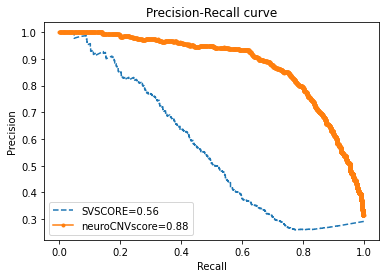

In [40]:
###RP curve del
pre_del, rec_del, _ = precision_recall_curve(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])
pre_del_orig, rec_del_orig, _ = precision_recall_curve(svsDel['disType'], svsDel['X0'])
#del_f1 = f1_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])
#del_auc_roc_auc_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])

plt.plot(rec_del,pre_del,linestyle="--",label = 'SVSCORE=0.56')
plt.plot(rec_del_orig,pre_del_orig,marker=".",label = 'neuroCNVscore=0.88')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

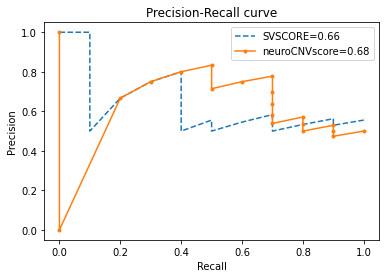

In [41]:
###RP curve dup
pre_dup, rec_dup, _ = precision_recall_curve(svsDup['disType'], svsDup['SVSCORESUM_SPAN'])
pre_dup_orig, rec_dup_orig, _ = precision_recall_curve(svsDup['disType'], svsDup['X0'])
#del_f1 = f1_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])
#del_auc_roc_auc_score(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])

plt.plot(rec_dup,pre_dup,linestyle="--",label = 'SVSCORE=0.66')
plt.plot(rec_dup_orig,pre_dup_orig,marker=".",label = 'neuroCNVscore=0.68')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall curve')
plt.legend()
plt.show() 

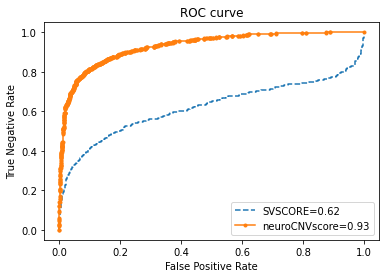

In [42]:
###AUC curve del
fpr_del, tpr_del, _ = roc_curve(svsDel['disType'], svsDel['SVSCORESUM_SPAN'])
fpr_del_orig, tpr_del_orig, _ = roc_curve(svsDel['disType'], svsDel['X0'])
plt.plot(fpr_del,tpr_del,linestyle="--",label ="SVSCORE=0.62")
plt.plot(fpr_del_orig,tpr_del_orig,marker=".",label ="neuroCNVscore=0.93")
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title('ROC curve')
plt.legend()
plt.show()

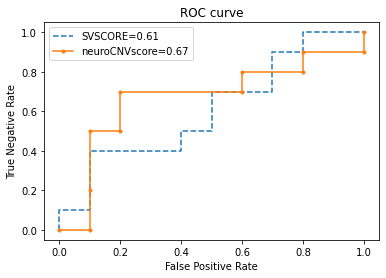

In [43]:
###AUC curve dup
fpr_dup, tpr_dup, _ = roc_curve(svsDup['disType'], svsDup['SVSCORESUM_SPAN'])
fpr_dup_orig, tpr_dup_orig, _ = roc_curve(svsDup['disType'], svsDup['X0'])
plt.plot(fpr_dup,tpr_dup,linestyle="--",label ="SVSCORE=0.61")
plt.plot(fpr_dup_orig,tpr_dup_orig,marker=".",label ="neuroCNVscore=0.67")
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.title('ROC curve')
plt.legend()
plt.show()

In [56]:
#####Usage: prediction with pretrained models #################

##step1. prepare data
#Annotated feature files with user interested copy number loss
exp_loss = pd.read_csv("copy_number_loss_example.bed",sep='\t', header=None)
exp_loss
#Load the pretrained model (pretained model were uploaded at github)

##step2. preprocessing
exp_loss.columns=['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain','13_Het_chromHMM_brain','14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain','17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain','5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_imputed_Brain','ATAC-seq_imputed_Neurosph','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper','Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper','chromHMM','ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2','ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3','ClinGen_haploinsufficiency_gene_40','ClinGen_haploinsufficiency_region','ClinGen_recurrent_CNV','ClinGen_region_curation_Haploinsufficiency_0','ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3','ClinGen_region_curation_Haploinsufficiency_40','ClinGen_region_curation_Triplosensitivity_0','ClinGen_region_curation_Triplosensitivity_1','ClinGen_region_curation_Triplosensitivity_2','ClinGen_region_curation_Triplosensitivity_3','ClinGen_region_curation_Triplosensitivity_40','ClinGen_triplosensitivity_gene_0','ClinGen_triplosensitivity_gene_1','ClinGen_triplosensitivity_gene_2','ClinGen_triplosensitivity_gene_30','ClinGen_triplosensitivity_gene_3','ClinGen_triplosensitivity_gene_40','ClinGen_triplosensitivity_gene','ClinGen_triplosensitivity_region','ctcf','CTCF_imputed_Brain','CTCF_imputed_Neurosph','CTCF_observed_Brain','DacMapExclude','ddg2p_gain','ddg2p_loss','ddg2p_other','dna_repair_gene_KangJ','dna_repair_gene_WoodRD','DNaselClusterd','DnaseMaster','DNase-seq_imputed_Brain','DNase-seq_imputed_Neurosph','DNase-seq_observed_Brain','DNase-seq_observed_Neurosph','DukeMapExclude','EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP','enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph','Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','gain_activating_score1','gain_activating_score2','gain_activating_score3','GC','gencode_CDS','gencode_exon','gencode_gene','gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union','H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain','H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain','H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000118','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0000924','HP_0001197','HP_0001250','HP_0001507','HP_0001626','HP_0001627','HP_0002011','HP_0002597','HP_0002715','HP_0002960','HP_0003011','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100545','HP_0100753','HP_0100852','Kinases','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','natural_prod_target','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','other_score1','other_score2','other_score3','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','prom_E007','prom_E009','prom_E010','prom_E053','prom_E054','prom_E067','prom_E068','prom_E069','prom_E070','prom_E071','prom_E072','prom_E073','prom_E074','prom_E081','prom_E082','proteinCodingExons','proteinCodingGenes','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR','PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','ribosomalGeneExons','ribosomalGenes','RoadmapDNasePromCount','Collins_rCNV_PLIgenes_PHI','Collins_rCNV_PLIgenes_PTS','SEA00101','SE_ele','sfari_cnv','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo','disType']
exp_loss['combined'] = exp_loss[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

#get the feature matrix
X_exp_loss = exp_loss[['chr','start','end','10_EnhA2_chromHMM_brain','11_EnhWk_chromHMM_brain','12_ZNF_chromHMM_brain', '13_Het_chromHMM_brain', '14_TssBiv_chromHMM_brain','15_EnhBiv_chromHMM_brain','16_ReprPC_chromHMM_brain', '17_ReprPCWk_chromHMM_brain','18_Quies_chromHMM_brain','1_TssA_chromHMM_brain','2_TssFlnk_chromHMM_brain','3_TssFlnkU_chromHMM_brain','4_TssFlnkD_chromHMM_brain', '5_Tx_chromHMM_brain','6_TxWk_chromHMM_brain','7_EnhG1_chromHMM_brain','8_EnhG2_chromHMM_brain','9_EnhA1_chromHMM_brain','ATAC-seq_observed_Brain','Brain_Angular_Gyrus_dbsuper','Brain_Anterior_Caudate_dbsuper','Brain_Cingulate_Gyrus_dbsuper',
                            'Brain_Hippocampus_Middle_150_dbsuper','Brain_Hippocampus_Middle_dbsuper','Brain_Inferior_Temporal_Lobe_dbsuper','Brain_Mid_Frontal_Lobe_dbsuper', 'ClinGen_haploinsufficiency_gene_0','ClinGen_haploinsufficiency_gene_1','ClinGen_haploinsufficiency_gene_2',
                            'ClinGen_haploinsufficiency_gene_30','ClinGen_haploinsufficiency_gene_3', 'ClinGen_haploinsufficiency_gene_40','ClinGen_region_curation_Haploinsufficiency_0', 'ClinGen_region_curation_Haploinsufficiency_1','ClinGen_region_curation_Haploinsufficiency_2','ClinGen_region_curation_Haploinsufficiency_30','ClinGen_region_curation_Haploinsufficiency_3',
                            'ClinGen_region_curation_Haploinsufficiency_40','ctcf','CTCF_observed_Brain','DacMapExclude','ddg2p_loss', 'DNaselClusterd','DnaseMaster','DNase-seq_observed_Brain',
                            'DNase-seq_observed_Neurosph','DukeMapExclude', 'EncodeAwgTfbsBroadNhaCtcf','EncodeRegTfbsClustered','enhancerAtlas_Astrocyte_EP',
                            'enhancerAtlas_Cerebellum_EP','enhancerAtlas_ESC_neuron_EP','EP300_imputed_Brain','EP300_imputed_Neurosph', 'Essential_in_culture_CRISPR','famton_astrocyte','famton_brain','famton_CL:0000127','famton_count','famton_neuronal_stem_cell','famton_permssive','FDA-approved_drug_targets','GC','gencode_CDS','gencode_exon','gencode_gene',
                            'gencode_Selenocysteine','gencode_start_codon','gencode_stop_codon','gencode_transcript','gencode_UTR','gene_enhancer_links_brain_enhcenter','gene_enhancer_links_neurosph_enhcenter','gpcr_union', 'H2AFZ_imputed_Brain','H2AFZ_imputed_Neurosph','H2AFZ_observed_Brain','H3k27ac','H3K27ac_imputed_Brain','H3K27ac_imputed_Neurosph','H3K27ac_observed_Brain','H3K27ac_observed_Neurosph','H3K27me3_imputed_Brain',
                            'H3K27me3_imputed_Neurosph','H3K27me3_observed_Brain','H3k4me1','H3K4me1_imputed_Brain','H3K4me1_imputed_Neurosph','H3K4me1_observed_Brain','H3K4me1_observed_Neurosph','H3K4me2_observed_Brain','H3k4me3','H3K4me3_imputed_Brain','H3K4me3_imputed_Neurosph','H3K4me3_observed_Brain','H3K4me3_observed_Neurosph','H3K9ac_imputed_Brain','H3K9ac_imputed_Neurosph','H3K9me3_imputed_Brain',
                            'H3K9me3_imputed_Neurosph','H3K9me3_observed_Brain','H3K9me3_observed_Neurosph','H4K20me1_imputed_Neurosph','H4K20me1_observed_Brain','hacer_T1','HAR','HetDomain','HP_0000707','HP_0000708','HP_0000717','HP_0000729','HP_0000752','HP_0001197','HP_0001250','HP_0001507','HP_0002011','HP_0002715','HP_0002960','HP_0011446','HP_0012443','HP_0012638','HP_0012639','HP_0012759','HP_0025031','HP_0031466','HP_0100022','HP_0100753',
                            'HP_0100852','liu_csbj_targetgene','loss_of_function_score1','loss_of_function_score2','loss_of_function_score3','methMCRF','mgi_essential_gene','miRNA','non-codingRNAs','nonEssential_in_culture_CRISPR','nott_Astrocyte_enhancers','nott_Astrocyte_promoters','nott_H3K4me3_around_TSS','nott_Microglia_enhancers','nott_Microglia_promoters','nott_Neuronal_enhancers','nott_Neuronal_promoters','nott_Oligo_enhancers','nott_Oligo_promoters','nott_superEnhancer','Olfactory_receptors_mainland','phastCons46way','phyloP46way','POLR2A_imputed_Neurosph','PsychENCODE_CBC_H3K27ac','PsychENCODE_HiC_EP','PsychENCODE_loops_interRegion','PsychENCODE_PEC_Enhancers','PsychENCODE_PFC_H3K27ac','PsychENCODE_TAR',
                            'PsychENCODE_TC_H3K27ac','RAD21_imputed_Brain','RAD21_imputed_Neurosph','RoadmapDNasePromCount', 'Collins_rCNV_PLIgenes_PHI',
                            'SEA00101','SE_ele','sfari_gene','SMC3_imputed_Brain','SMC3_imputed_Neurosph','snp_selex','TAD56','tss2000bp','vista','yue_loops_hippo']]


X_exp_loss['length'] = X_exp_loss['end'] - X_exp_loss['start']
X_exp_loss=X_exp_loss.drop(['chr'], axis=1)
X_exp_loss_leng = X_exp_loss.div(X_exp_loss['length'], axis='rows')

X_exp_loss_leng=X_exp_loss_leng.drop(['start','end','length'], axis=1)
X_exp_loss_new = pd.DataFrame(minmax_scale(X_exp_loss_leng),  columns=X_exp_loss_leng.columns)


#Step3: Prediction and output 
y_pred_exp_loss=xgbmodel_del_tun.predict_proba(X_exp_loss_new)[:, 1]

y_pred_exp_loss

array([0.42276654, 0.17916715, 0.67957443], dtype=float32)

In [ ]:
#####Additional analyses#################

In [ ]:
####Model selection#######

In [44]:
####To compare models among xgboost,GaussianNB,LogisticRegression amd SVM and to select the model with best performance
#Model selection -> copy number loss 
X_train, X_test, y_train, y_test =X_train_del,X_test_del,y_train_del,y_test_del

#Model selection -> copy number gain
#X_train, X_test, y_train, y_test =X_train_dup,X_test_dup,y_train_dup,y_test_dup


from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

NB = GaussianNB()
NB.fit(X_train, y_train)
LR = LogisticRegression()
LR.fit(X_train,y_train)
Svc = SVC(kernel='linear',probability=True)
Svc.fit(X_train,y_train)
XGB = XGBClassifier(objective="binary:logistic",nthread=100)
XGB.fit(X_train,y_train)

models = [NB,LR,Svc,XGB]
names = ["NB","LR","SVC","XGB"]
evaluates = ['accuracy','precision','recall','f1','auc']

df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    # f1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    y_test_pred = model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
   
    df = pd.DataFrame(np.array(
        [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
         test_f1, test_auc]).reshape(2, -1),
                      index=['train', 'test'],
                      columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score']) #index = row 
    df_list.append(df)
pd.concat(df_list, axis=0, keys=names)


Accuracy  Precision    Recall  F1-Score  AUC-Score
NB  train  0.562336   0.732919  0.193021  0.305568   0.561500
    test   0.567440   0.759162  0.208483  0.327129   0.711276
LR  train  0.643667   0.723042  0.463104  0.564591   0.643258
    test   0.665337   0.756018  0.496765  0.599566   0.732122
SVC train  0.614380   0.760100  0.331698  0.461850   0.613741
    test   0.625453   0.774540  0.363048  0.494371   0.731414
XGB train  0.771783   0.733240  0.852781  0.788505   0.771967
    test   0.767948   0.729383  0.858375  0.788639   0.847333

Text(0.5, 1.0, 'ROC curve')

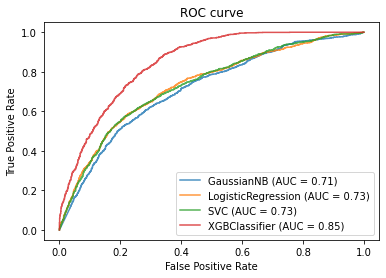

In [45]:
###AUC plot
from sklearn.metrics import plot_roc_curve

classifiers = [NB,LR,Svc,XGB]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax, alpha=0.8)
plt.title('ROC curve')

In [ ]:
##Parameter tunning with gridCV#############

In [46]:
###Following parameters were optimized: max_depth,min_child_weight,learning_rate,gamma,subsample,colsample_bytree
##Similar steps were applied to both copy number loss and copy number gain models

X_train_gridsearch, y_train_gridsearch = X_train_del,y_train_del

param_test1 = {
    'max_depth':[i for i in range(2,10,2)],
    'min_child_weight':[i for i in range(1,6,2)]}

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(
        estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=140,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=100,
        scale_pos_weight=1,
        seed=27),
    param_grid = param_test1,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5)
gsearch.fit(X_train_gridsearch,y_train_gridsearch)
print('gsearch1.best_params_', gsearch.best_params_)
print('gsearch1.best_score_', gsearch.best_score_)

gsearch1.best_params_ {'max_depth': 8, 'min_child_weight': 1}
gsearch1.best_score_ 0.844901398843203
